## Exploración y limpieza de datos

Importaciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Carga del dataset

In [3]:
df = pd.read_csv("surv_variants.csv")

#### Muestra	las	primeras	15	filas	del	dataset	para	obtener	una	idea	de	su	estructura

In [4]:
df.head(15)

,Country,first_seq,num_seqs,last_seq,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,China,2019-10-22,3,2020-06-03,S.Q677,2020-06-21,225,True,0.052983,18259.460123,967.435583,16447.430706
1,USA,2020-03-03,26022,2021-11-19,S.Q677,2020-11-01,626,False,0.016111,256577.596234,4133.841031,84748.745876
2,Brazil,2020-03-09,1553,2021-11-12,S.Q677,2020-11-07,613,False,0.027846,101550.140466,2827.764288,42356.907426
3,Australia,2020-03-20,88,2021-11-14,S.Q677,2020-11-18,604,False,0.009905,1402.239579,13.889752,1227.122500
4,Sweden,2020-03-20,810,2021-11-19,S.Q677,2020-11-18,609,False,0.012711,1659.148728,21.089425,2521.042925
5,Spain,2020-03-20,1033,2021-11-21,S.Q677,2020-11-18,611,False,0.017283,19008.576071,328.528593,9904.841293
6,UK,2020-03-26,6718,2021-11-24,S.Q677,2020-11-24,608,False,0.014431,211650.102470,3054.417780,219867.190258
7,Germany,2020-03-27,3560,2021-11-18,S.Q677,2020-11-25,601,False,0.018967,17896.698205,339.440979,9198.318857
8,Mexico,2020-03-28,278,2021-11-08,S.Q677,2020-11-26,590,False,0.075712,9926.348816,751.544703,6918.615103
9,Canada,2020-04-01,2380,2021-10-29,S.Q677,2020-11-30,576,False,0.016911,124014.195095,2097.199830,55028.403975


#### Identifica	cuáles	son	las	columnas	categóricas	y	cuáles	son	numéricas.

In [5]:
print("Columnas y sus tipos:\n")
df.dtypes

Columnas y sus tipos:



Country            object
first_seq          object
num_seqs            int64
last_seq           object
variant            object
censure_date       object
duration            int64
censored             bool
mortality_rate    float64
total_cases       float64
total_deaths      float64
growth_rate       float64
dtype: object

In [6]:
# Guardar las columnas categóricas en una variable
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Guardar las columnas numéricas en una variable
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas categóricas:", columnas_categoricas)
print("Columnas numéricas:", columnas_numericas)

Columnas categóricas: ['Country', 'first_seq', 'last_seq', 'variant', 'censure_date']
Columnas numéricas: ['num_seqs', 'duration', 'mortality_rate', 'total_cases', 'total_deaths', 'growth_rate']


#### Verifica	si	hay	valores	nulos	en	el	dataset	y	calcula	su	proporción	por	columna. El número	debe	aparecer	con	dos	decimales	y	terminado	en	‘%’.

In [19]:
if (df.isnull().sum().sum()):
    print("Hay valores nulos en el dataset")
    print(df.isnull().sum().sum())
else:
    print("No hay valores nulos en el dataset")
    
print("\nPorcentaje de nulos:\n")
porcentaje_de_nulos = df.isnull().mean()*100
print(porcentaje_de_nulos)

No hay valores nulos en el dataset

Porcentaje de nulos:

Country            0.00%
first_seq          0.00%
num_seqs           0.00%
last_seq           0.00%
variant            0.00%
censure_date       0.00%
duration           0.00%
censored           0.00%
mortality_rate     0.00%
total_cases        0.00%
total_deaths       0.00%
growth_rate        0.00%
first_seq_month    0.00%
first_seq_year     0.00%
fatality_rate      0.00%
active_cases       0.00%
dtype: object


## Transformaciones y manipulaciones

#### Convierte	las	columnas	`first_seq`,	`last_seq`,	y	`censure_date`	al	tipo	de	dato	`datetime`.

In [20]:
# Columnas antes de modificarse
print(df["first_seq"].dtypes)
print(df["last_seq"].dtypes)
print(df["censure_date"].dtypes)

# Cambiar de objet a datetime64
df['first_seq'] = pd.to_datetime(df['first_seq'], format='mixed')
df['last_seq'] = pd.to_datetime(df['first_seq'], format='mixed')
df['censure_date'] = pd.to_datetime(df['first_seq'], format='mixed')

print(df['first_seq'].dtypes)
print(df['last_seq'].dtypes)
print(df['censure_date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


#### Extrae	el	mes	y	el	año	de	la	columna	`first_seq`	y	guárdalos en	dos nuevas columnas llamadas	 `first_seq_month` y	 `first_seq_year`.

In [21]:
# Extraer el mes
df['first_seq_month'] = df['first_seq'].dt.month

# Extraer el año
df['first_seq_year'] = df['first_seq'].dt.year

print("Mes extraído:\n", df['first_seq_month'])
print("\nAño extraído:\n", df['first_seq_year'])


Mes extraído:
 0       10
1        3
2        3
3        3
4        3
        ..
4108     8
4109     8
4110     9
4111    10
4112    10
Name: first_seq_month, Length: 4113, dtype: int32

Año extraído:
 0       2019
1       2020
2       2020
3       2020
4       2020
        ... 
4108    2021
4109    2021
4110    2021
4111    2021
4112    2021
Name: first_seq_year, Length: 4113, dtype: int32


#### Crea	una	nueva	columna	`fatality_rate`	calculada	como:	`fatality_rate	=	total_deaths	/	total_cases`.

In [22]:
# Crear la columna fatality_rate con su operación
df['fatality_rate'] = df['total_deaths'] / df['total_cases']
df['fatality_rate']

0       0.052983
1       0.016111
2       0.027846
3       0.009905
4       0.012711
          ...   
4108    0.014838
4109    0.004407
4110    0.024429
4111    0.034727
4112    0.007705
Name: fatality_rate, Length: 4113, dtype: float64

#### Filtra	las	filas	donde	`variant`	sea	'S.Q677'	y	crea	un	nuevo	`DataFrame`	con	esos	datos.

In [23]:
# Filtrar las filas que cumplan con la condición en una variable
variant_sq677 = df[df["variant"] == "S.Q677"]

# Guardar las filas de la variable en un DataFrame nuevo
df_only_sq677 = pd.DataFrame(variant_sq677)

# Printear el DataFrame entero
# print("\nDataFrame entero\n", df_only_sq677)

# Printear sólo variant
print("\nSólo variant\n", df_only_sq677["variant"])



Sólo variant
 0      S.Q677
1      S.Q677
2      S.Q677
3      S.Q677
4      S.Q677
        ...  
132    S.Q677
133    S.Q677
134    S.Q677
135    S.Q677
136    S.Q677
Name: variant, Length: 137, dtype: object


#### Crea	una	nueva	columna	`active_cases`	calculada	como:	`active_cases	=	total_cases	- total_deaths`.

In [24]:
# Crear la columna active_cases con su operación
df['active_cases'] = df['total_cases'] - df['total_deaths']
df['active_cases']

0        17292.024540
1       252443.755203
2        98722.376178
3         1388.349827
4         1638.059303
            ...      
4108     51469.752066
4109       485.417021
4110      3760.992000
4111       977.086957
4112     18364.406250
Name: active_cases, Length: 4113, dtype: float64

## Manejo de datos faltantes

####  Identifica	cuántos	valores	faltantes	tiene	la	columna	`growth_rate`	y	su	proporción	en	el	dataset

In [25]:
# Identificar valores faltantes de growth_rate
print("\nValores nulos en growth_rate:\n", df["growth_rate"].isnull())



Valores nulos en growth_rate:
 0       False
1       False
2       False
3       False
4       False
        ...  
4108    False
4109    False
4110    False
4111    False
4112    False
Name: growth_rate, Length: 4113, dtype: bool


#### Rellena	los	valores	nulos	de	la	columna	`growth_rate`	con	la	media	de	la	misma.

In [26]:
# Crear una variable que contenga la media de growth_rate
media_growth_rate = df["growth_rate"].mean()
df["growth_rate"].fillna(media_growth_rate, inplace=True)
#print("\nMedia de `growth_rate`:", media_growth_rate)

# Rellenar los valores nulos con la media
df["growth_rate"].fillna(media_growth_rate, inplace=True)

print("\nDataFrame con valores nulos rellenados:\n", df)


DataFrame con valores nulos rellenados:
          Country  first_seq  num_seqs   last_seq    variant censure_date  \
0          China 2019-10-22         3 2019-10-22     S.Q677   2019-10-22   
1            USA 2020-03-03     26022 2020-03-03     S.Q677   2020-03-03   
2         Brazil 2020-03-09      1553 2020-03-09     S.Q677   2020-03-09   
3      Australia 2020-03-20        88 2020-03-20     S.Q677   2020-03-20   
4         Sweden 2020-03-20       810 2020-03-20     S.Q677   2020-03-20   
...          ...        ...       ...        ...        ...          ...   
4108  Kazakhstan 2021-08-17        88 2021-08-17  21J.Delta   2021-08-17   
4109      Cyprus 2021-08-28         1 2021-08-28  21J.Delta   2021-08-28   
4110      Guyana 2021-09-06        18 2021-09-06  21J.Delta   2021-09-06   
4111     Comoros 2021-10-05        11 2021-10-05  21J.Delta   2021-10-05   
4112     Belarus 2021-10-27         1 2021-10-27  21J.Delta   2021-10-27   

      duration  censored  mortality_rate    t

C:\Users\Eurobeater\AppData\Local\Temp\ipykernel_7392\2273255186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["growth_rate"].fillna(media_growth_rate, inplace=True)
C:\Users\Eurobeater\AppData\Local\Temp\ipykernel_7392\2273255186.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

####  Rellena	los	valores	nulos	de	`growth_rate`	utilizando	la	interpolación	lineal.

## Visualización y análisis exploratorio

#### Crea	un	histograma	para	analizar	la	distribución	de	la	columna	`mortality_rate`

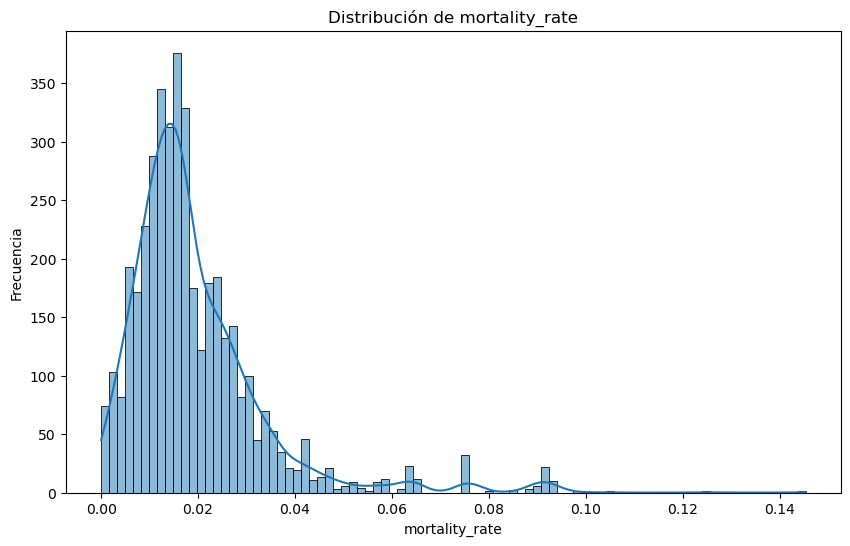

In [27]:
# Crear una gráfica de 10 * 6 pulgadas
plt.figure(figsize=(10, 6))
# Usar Seaborn para representar un histograma
sns.histplot(df['mortality_rate'], kde=True)
plt.xlabel('mortality_rate')
plt.ylabel('Frecuencia')
plt.title('Distribución de mortality_rate')
# Mostrar la tabla
plt.show()

#### Genera	un	gráfico	de	barras	para	mostrar	el	promedio	de	`growth_rate`	por	variante (`variant`).	

c:\Users\Eurobeater\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EU identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\Users\Eurobeater\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EU identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


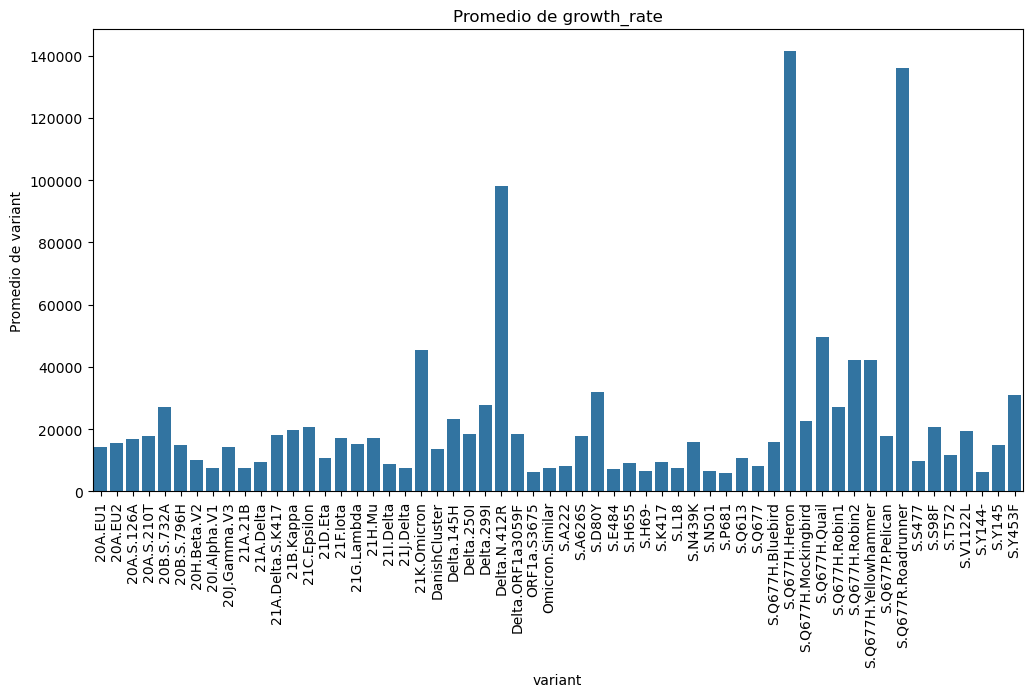

In [28]:
# Agrupar por variant y calcular el promedio de growth_rate
variant = df.groupby('variant')['growth_rate'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=variant.index, y=variant.values)
plt.xlabel('variant')
plt.ylabel('Promedio de variant')
plt.title('Promedio de growth_rate')
plt.xticks(rotation=90)
plt.show()


#### Crea	un	gráfico	de	dispersión	para	analizar	la	relación	entre	`total_cases`	y	`total_deaths`,	diferenciando	los	puntos	por	país	(`Country`).	

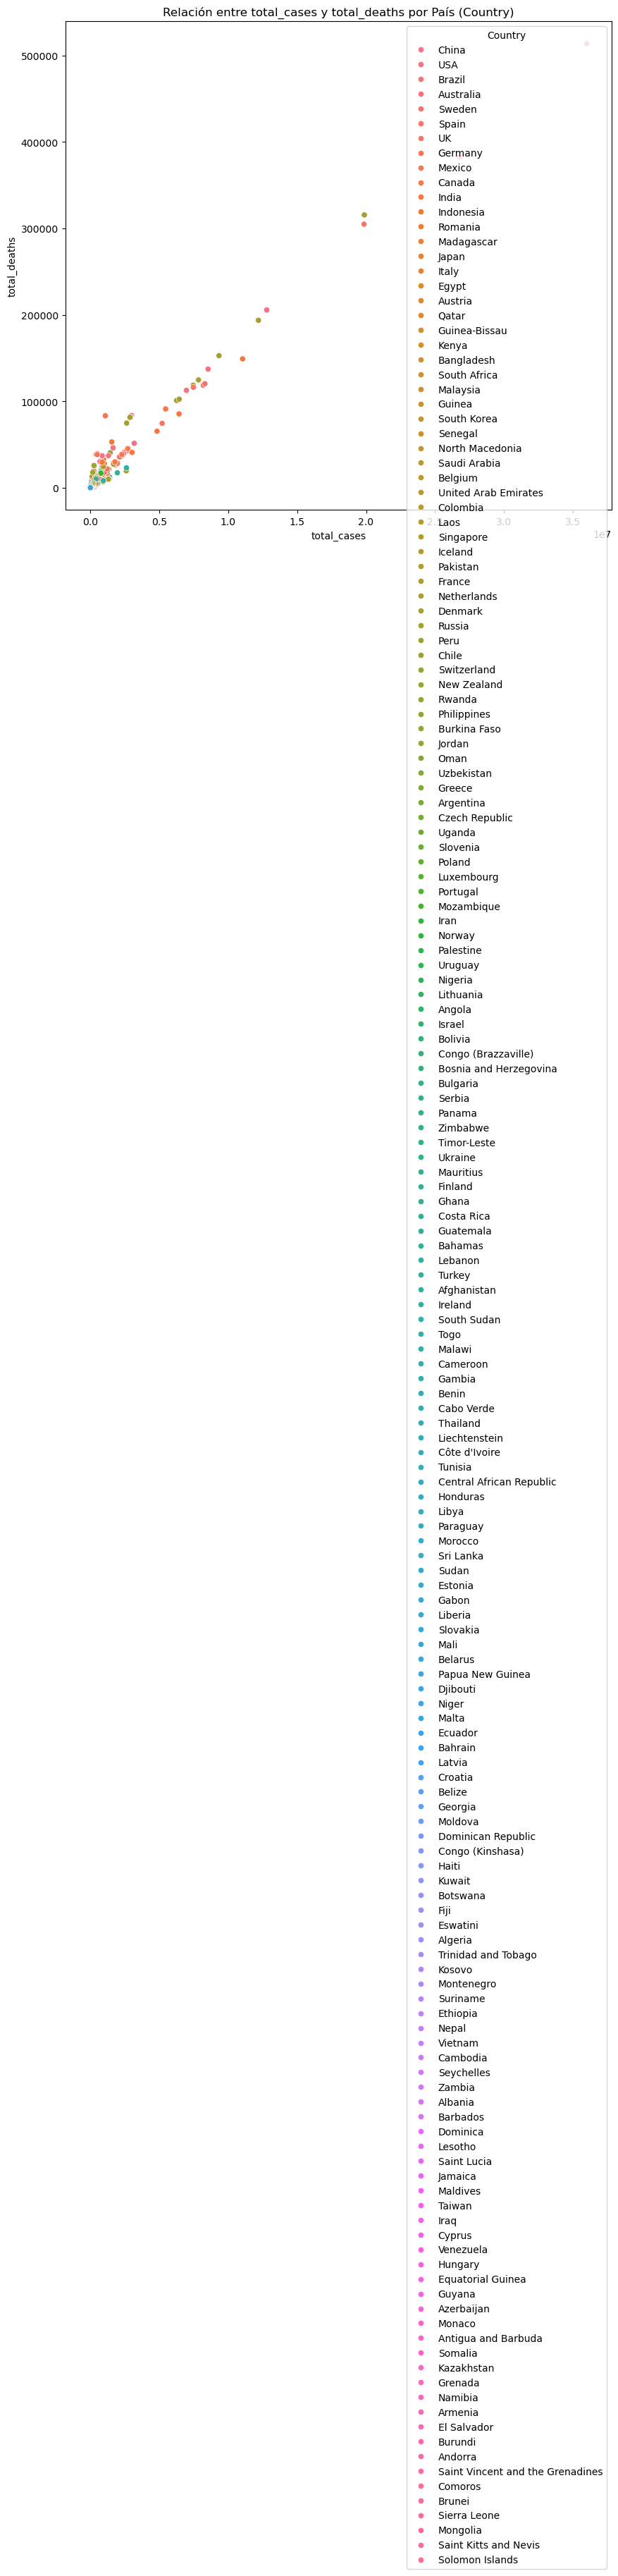

In [29]:
plt.figure(figsize=(10, 9))
# Crear gráfico de dispersión con Seaborn
sns.scatterplot(x='total_cases', y='total_deaths', hue='Country', data=df)
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.title('Relación entre total_cases y total_deaths por País (Country)')
plt.show()


#### Genera	un	boxplot	para	analizar	la	variabilidad	de	`duration`	por	variante	(`variant`).

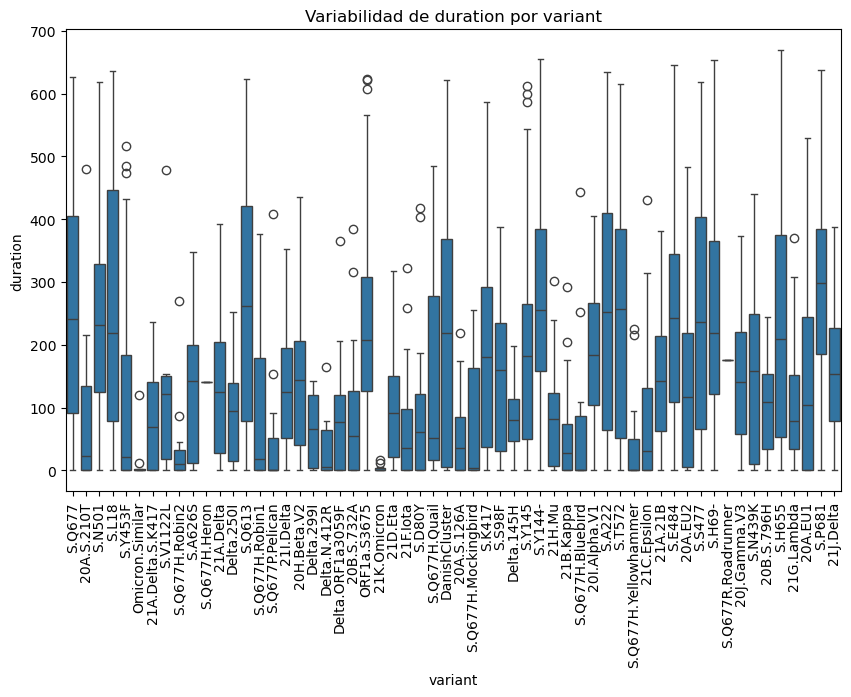

In [30]:
plt.figure(figsize=(10, 6))
# Crear boxplot con Seaborn
sns.boxplot(x='variant', y='duration', data=df)
plt.xlabel('variant')
plt.ylabel('duration')
plt.title('Variabilidad de duration por variant')
plt.xticks(rotation=90)
plt.show()
